Episode 100/1000, Total Reward: 93
Episode 200/1000, Total Reward: 90
Episode 300/1000, Total Reward: 89
Episode 400/1000, Total Reward: 93
Episode 500/1000, Total Reward: 89
Episode 600/1000, Total Reward: 91
Episode 700/1000, Total Reward: 93
Episode 800/1000, Total Reward: 92
Episode 900/1000, Total Reward: 91
Episode 1000/1000, Total Reward: 86


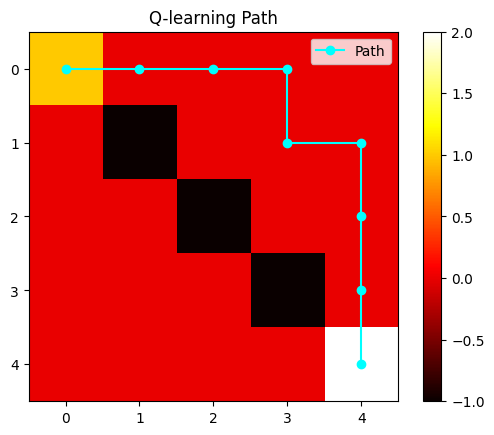

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
grid_size = 5  # 5x5 grid
goal_position = (4, 4)  # The goal is at the bottom-right corner
start_position = (0, 0)  # Starting at the top-left corner
walls = [(1, 1), (2, 2), (3, 3)]  # Some obstacles (walls)

# Actions: up, down, left, right
actions = ['up', 'down', 'left', 'right']
action_map = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate
episodes = 1000  # Number of training episodes

# Initialize Q-table
Q = np.zeros((grid_size, grid_size, len(actions)))  # Q(s, a) table

# Define the reward structure
def get_reward(position):
    if position == goal_position:
        return 100  # Reward for reaching the goal
    elif position in walls:
        return -10  # Penalty for hitting a wall
    else:
        return -1  # Small penalty for each move

# Choose an action using epsilon-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(actions)))  # Exploration
    else:
        return np.argmax(Q[state[0], state[1]])  # Exploitation

# Move the agent in the grid based on the chosen action
def move(state, action):
    new_state = (state[0] + action_map[actions[action]][0],
                 state[1] + action_map[actions[action]][1])
    # Check if new state is within bounds
    new_state = (max(0, min(grid_size-1, new_state[0])), max(0, min(grid_size-1, new_state[1])))
    if new_state in walls:
        return state  # If there's a wall, stay in the same position
    return new_state

# Training the agent using Q-learning
def train():
    for episode in range(episodes):
        state = start_position
        total_reward = 0
        while state != goal_position:
            action = choose_action(state)
            next_state = move(state, action)
            reward = get_reward(next_state)
            total_reward += reward
            # Q-learning update rule
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Testing the learned policy
def test():
    state = start_position
    path = [state]
    while state != goal_position:
        action = np.argmax(Q[state[0], state[1]])  # Choose the best action based on Q-table
        state = move(state, action)
        path.append(state)
    return path

# Visualize the grid and the agent's path
def visualize(path):
    grid = np.zeros((grid_size, grid_size))
    for (i, j) in walls:
        grid[i, j] = -1  # Mark walls
    grid[goal_position[0], goal_position[1]] = 2  # Mark goal
    grid[start_position[0], start_position[1]] = 1  # Mark start

    # Plot the grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.colorbar()
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, marker='o', color='cyan', label='Path')
    plt.title("Q-learning Path")
    plt.legend()
    plt.show()

# Train the agent
train()

# Test the learned policy
path = test()

# Visualize the agent's path
visualize(path)
